<a href="https://colab.research.google.com/github/carolinaperes85/CI_CD/blob/main/CASE_REGRESS%C3%83O_LINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise sobre qual melhor variável para fazer a previsão dos preços dos apartamento de Boston

In [ ]:
#importando o dataset e as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv('/content/housing.csv')

df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,NaN,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,NaN,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,NaN,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,NaN,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#verificando o tamanho, tipo de dados e valores ausentes
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54 non-null     float64
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        452 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


Unnamed: 0    452
CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV           54
dtype: int64

ZN: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

INDUS: proporção de hectares de negócios não varejistas por cidade

CHAS: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)

NOX: concentração de óxidos nítricos (partes por 10 milhões)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Carregar o Conjunto de Dados 124

RM: número médio de quartos por habitação

IDADE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940

DIS: distâncias ponderadas para cinco centros de emprego de Boston

RAD: índice de acessibilidade às rodovias radiais

IMPOSTO: valor total do imposto predial por US$ 10.000

PTRATIO: relação aluno-professor por município 12. B: 1000(Bk−0,63)2 onde 

Bk é a proporção de negros por município 13. 

LSTAT: % de status inferior da população

MEDV: Valor médio de residências ocupadas pelo proprietário em US$ 1.000
Podemos ver que os atributos de entrada possuem uma mistura de unidades.

In [ ]:
#verificando estatísticas básicas

df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,54.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,21.967222,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,16.362748,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,10.062300,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,13.146275,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,15.431850,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,23.385425,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,88.976200,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


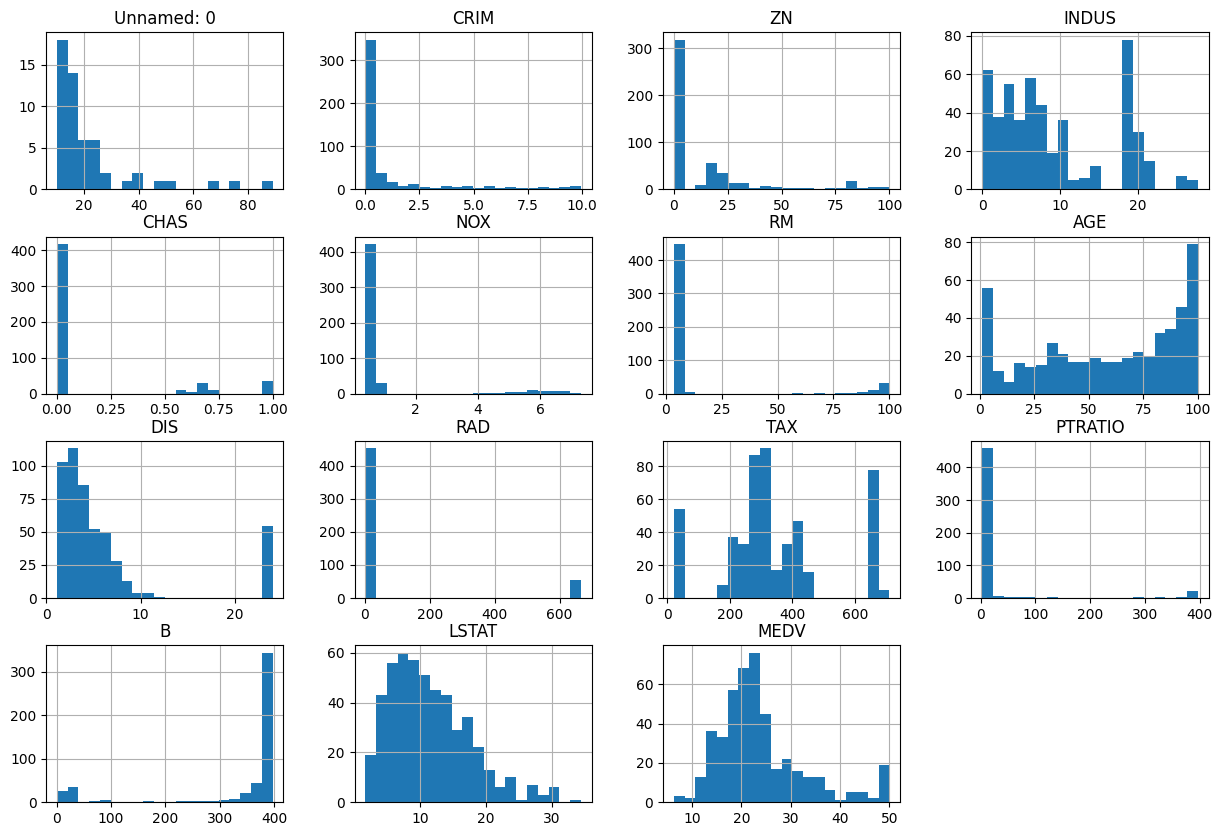

In [ ]:
#Explorando a distribuição de variáveis numéricas:

import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(15,10))
plt.show()


Gráfico de correlação e escolha de atributo

In [ ]:
df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Unnamed: 0,1.000000,NaN,NaN,NaN,0.033421,-0.021835,0.113751,-0.252919,NaN,NaN,NaN,0.009480,-0.010013,-0.301978,NaN
CRIM,NaN,1.000000,-0.288969,0.586719,-0.067536,-0.139448,-0.185045,0.462470,-0.312843,-0.151996,0.754362,-0.140015,-0.053260,0.392225,-0.286245
ZN,NaN,-0.288969,1.000000,-0.491587,-0.005843,0.038450,0.078721,-0.488006,0.268317,0.062767,-0.256799,0.049491,0.015810,-0.390092,0.331570
INDUS,NaN,0.586719,-0.491587,1.000000,-0.185873,-0.394483,-0.448809,0.700699,-0.605973,-0.427834,0.748951,-0.351166,0.233471,0.465583,-0.411915
CHAS,0.033421,-0.067536,-0.005843,-0.185873,1.000000,0.585243,0.585447,-0.269616,0.523772,0.587673,-0.347552,0.470870,-0.495956,0.011260,0.154409
NOX,-0.021835,-0.139448,0.038450,-0.394483,0.585243,1.000000,0.975767,-0.550065,0.923503,0.985957,-0.570346,0.775302,-0.856608,0.079688,-0.332778
RM,0.113751,-0.185045,0.078721,-0.448809,0.585447,0.975767,1.000000,-0.595786,0.946946,0.992620,-0.610962,0.806522,-0.848289,0.029450,0.740181
AGE,-0.252919,0.462470,-0.488006,0.700699,-0.269616,-0.550065,-0.595786,1.000000,-0.744068,-0.585574,0.635697,-0.477048,0.417216,0.414354,-0.299893
DIS,NaN,-0.312843,0.268317,-0.605973,0.523772,0.923503,0.946946,-0.744068,1.000000,0.947606,-0.689224,0.766224,-0.778075,-0.080368,0.138798
RAD,NaN,-0.151996,0.062767,-0.427834,0.587673,0.985957,0.992620,-0.585574,0.947606,1.000000,-0.586540,0.805556,-0.861694,0.056185,-0.217902


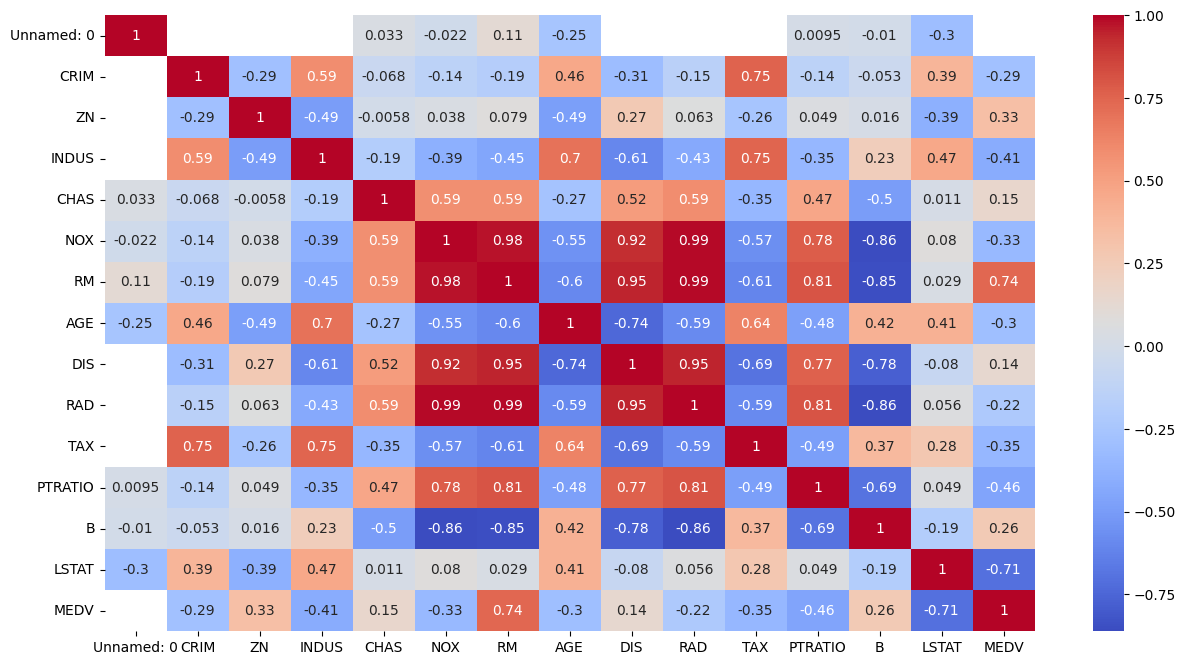

In [ ]:
# heatmap para visualizar a matriz de correlação das variáveis

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Exibindo o gráfico
plt.show()

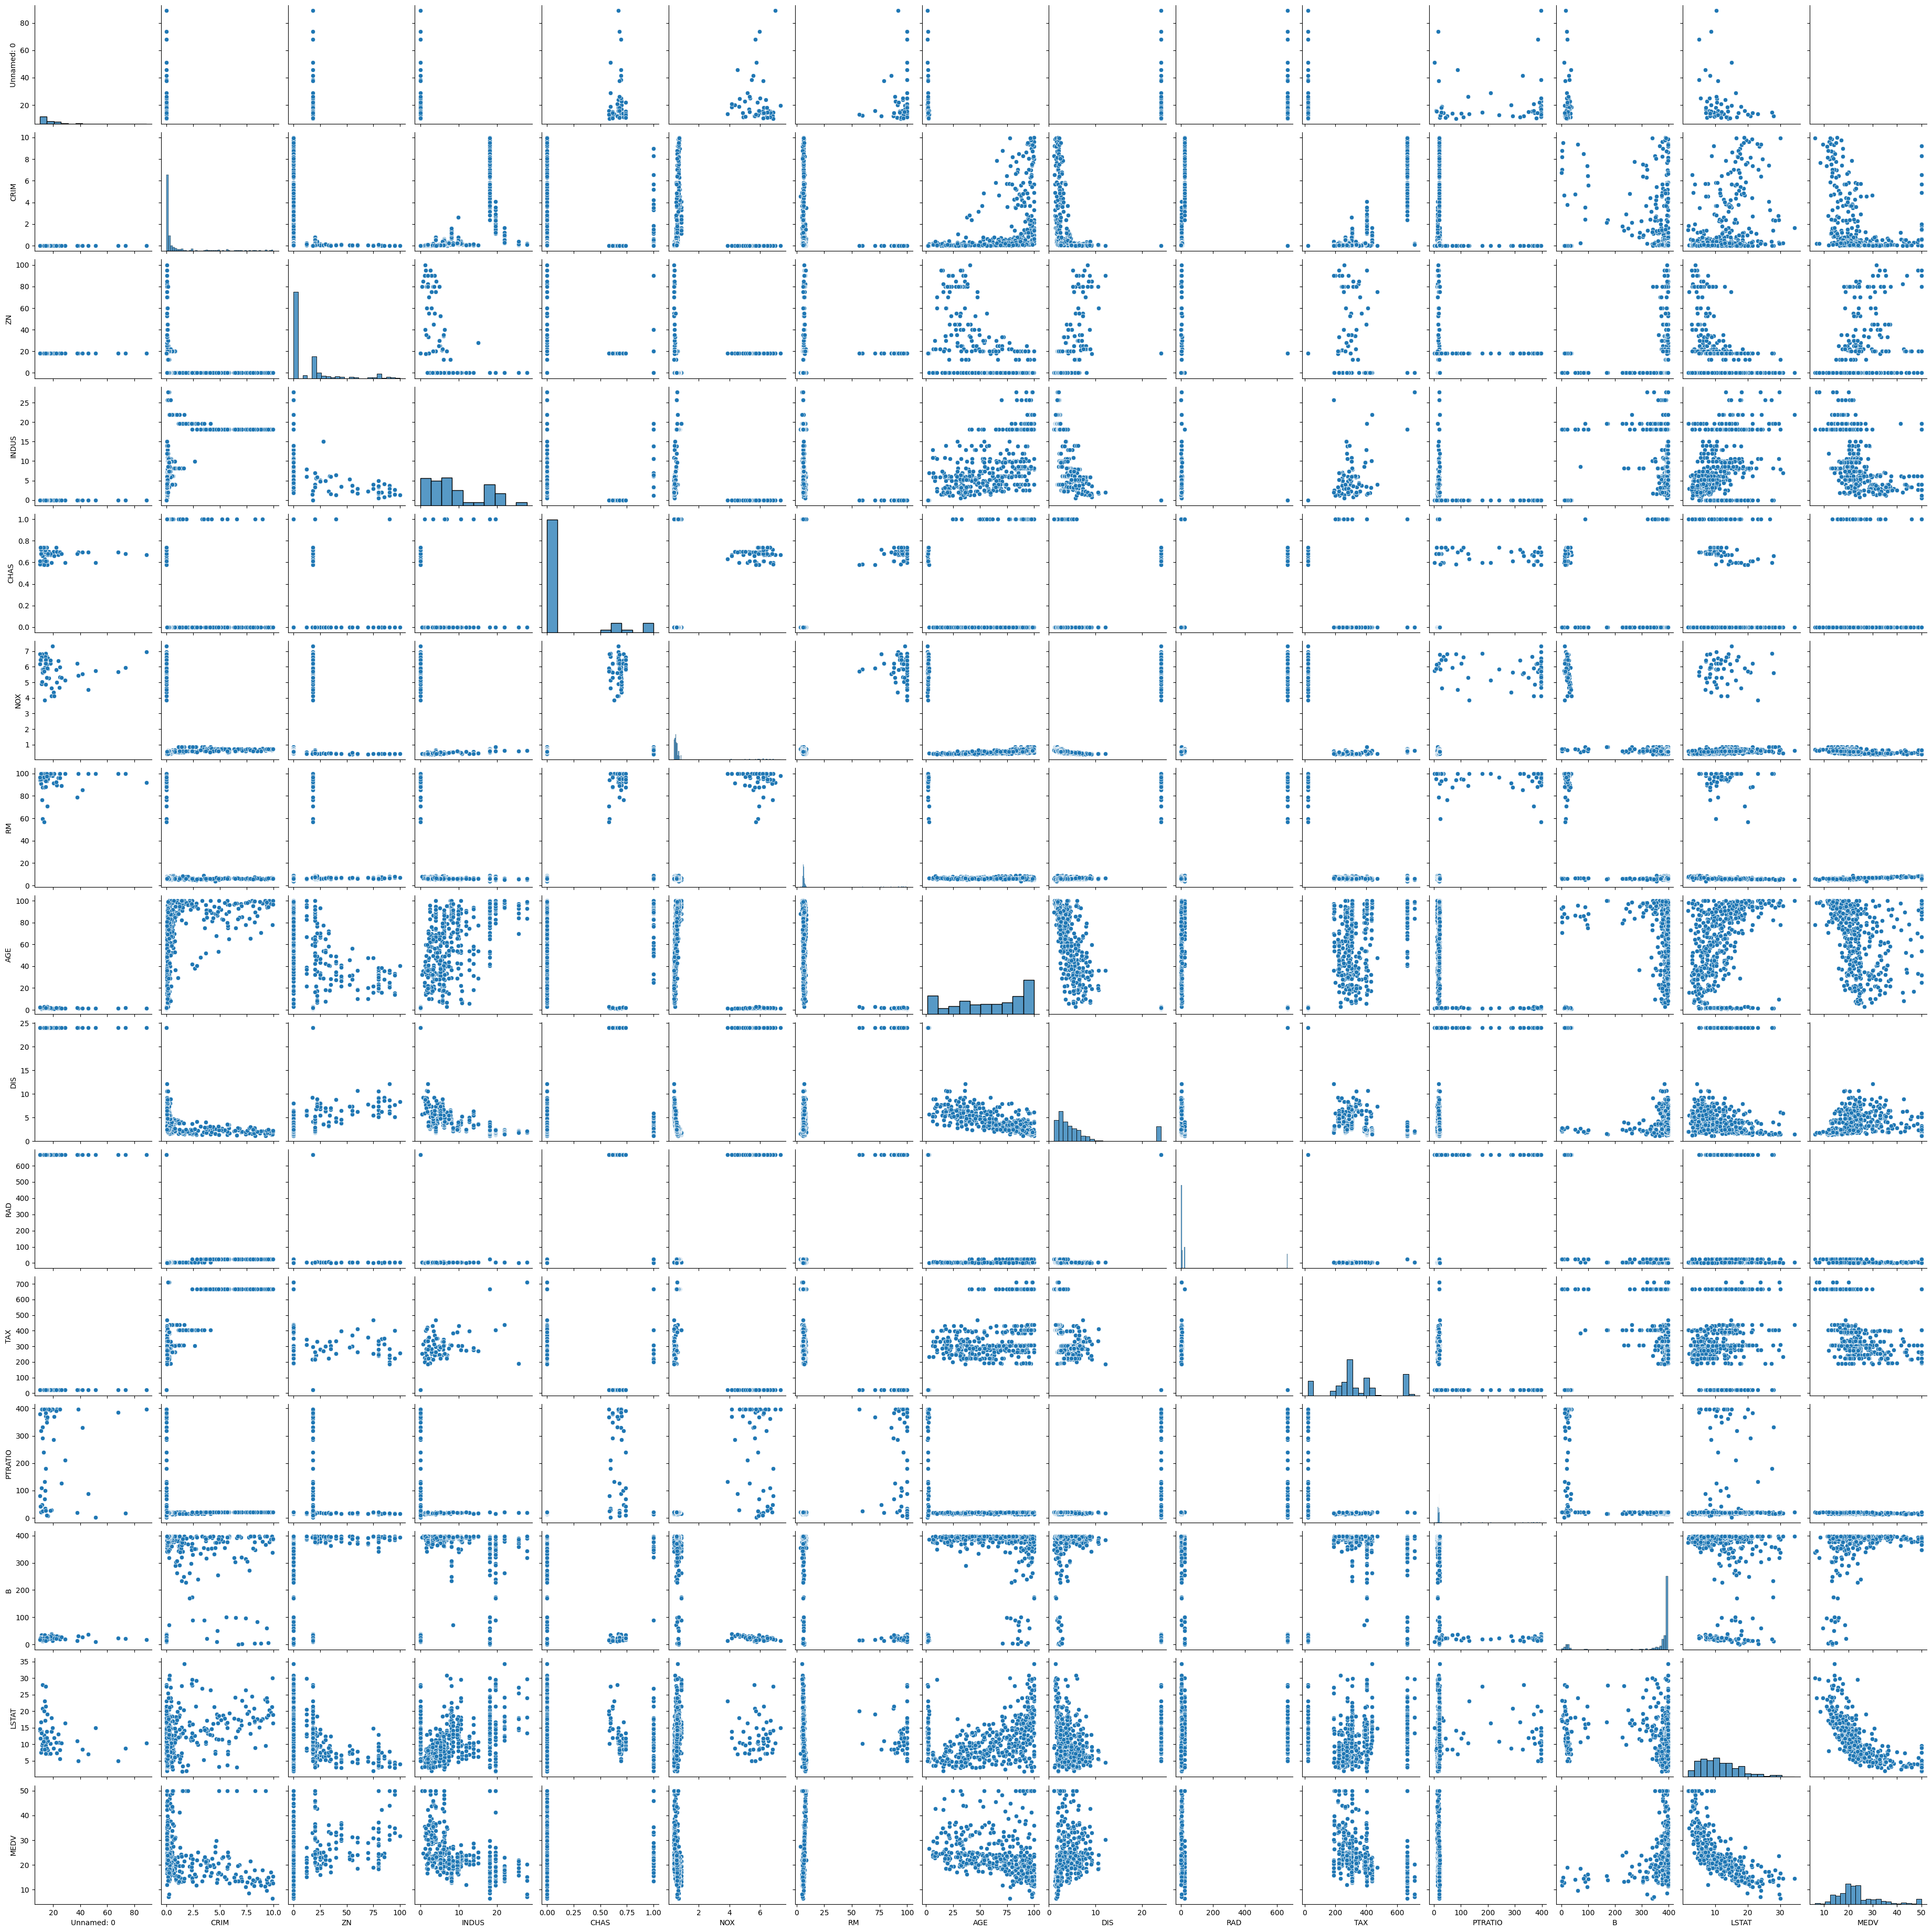

In [ ]:
sns.pairplot(df);

Escolher 3 atributos e treinar cada um deles no modelo simples


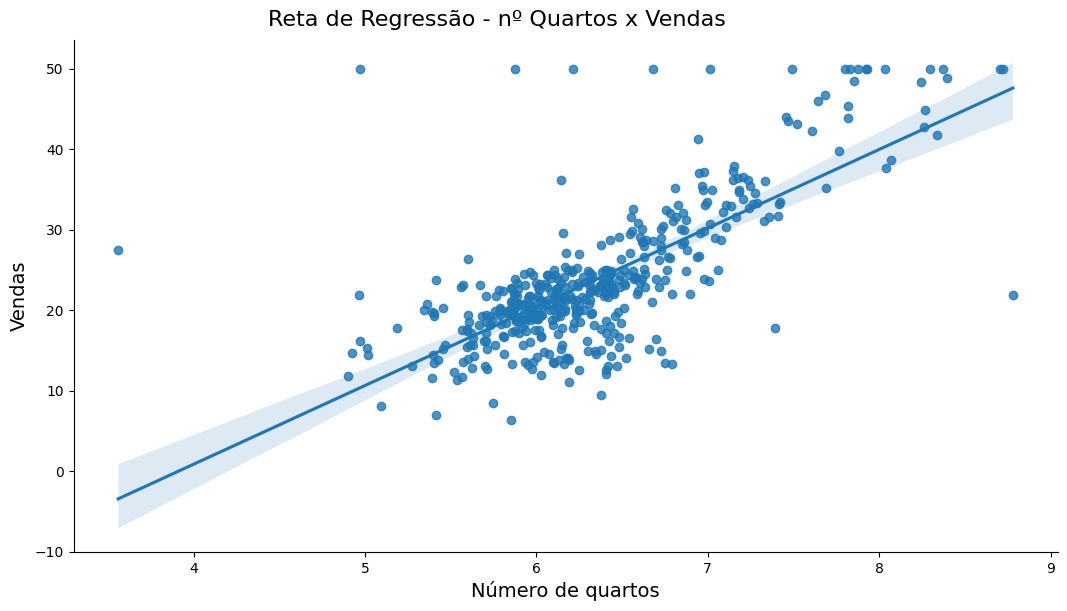

In [ ]:
# Reta de regressão teste 1

ax = sns.lmplot(x="RM", y="MEDV", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - nº Quartos x Vendas', fontsize=16, y=1.02)
ax.set_xlabels("Número de quartos", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = 'MEDV~RM-1'
model = smf.ols(formula=function, data=df).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              5224.
Date:                Thu, 04 May 2023   Prob (F-statistic):                   3.87e-250
Time:                        13:22:58   Log-Likelihood:                         -1529.9
No. Observations:                 452   AIC:                                      3062.
Df Residuals:                     451   BIC:                                      3066.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

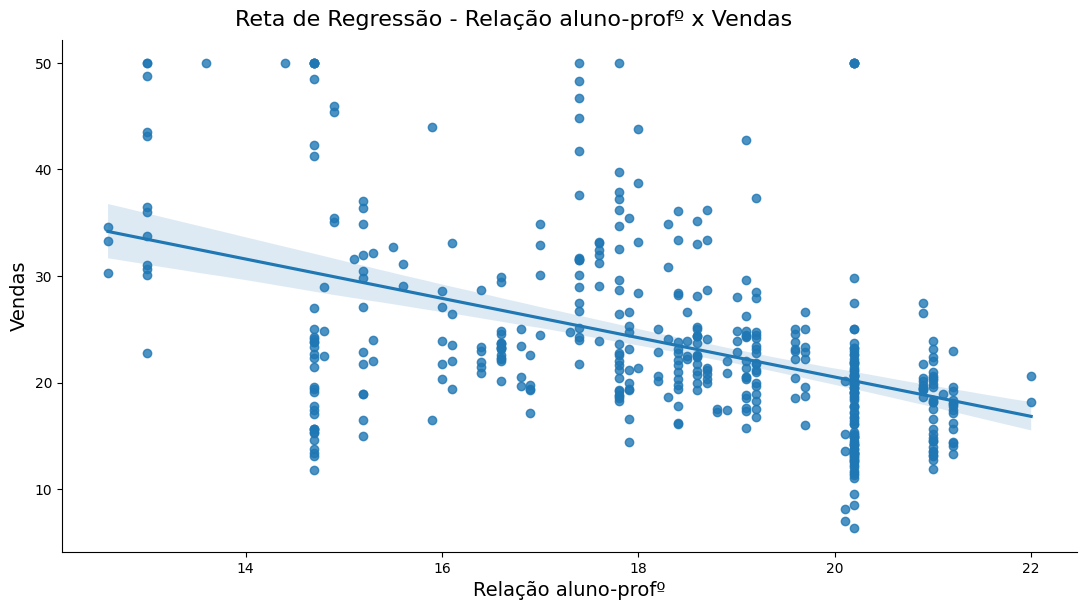

In [ ]:
# Reta de regressão teste 2

ax = sns.lmplot(x="PTRATIO", y="MEDV", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Relação aluno-profº x Vendas', fontsize=16, y=1.02)
ax.set_xlabels("Relação aluno-profº", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;

In [ ]:
function = 'MEDV~PTRATIO-1'
model = smf.ols(formula=function, data=df).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              2225.
Date:                Thu, 04 May 2023   Prob (F-statistic):                   1.78e-176
Time:                        13:23:17   Log-Likelihood:                         -1699.8
No. Observations:                 452   AIC:                                      3402.
Df Residuals:                     451   BIC:                                      3406.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

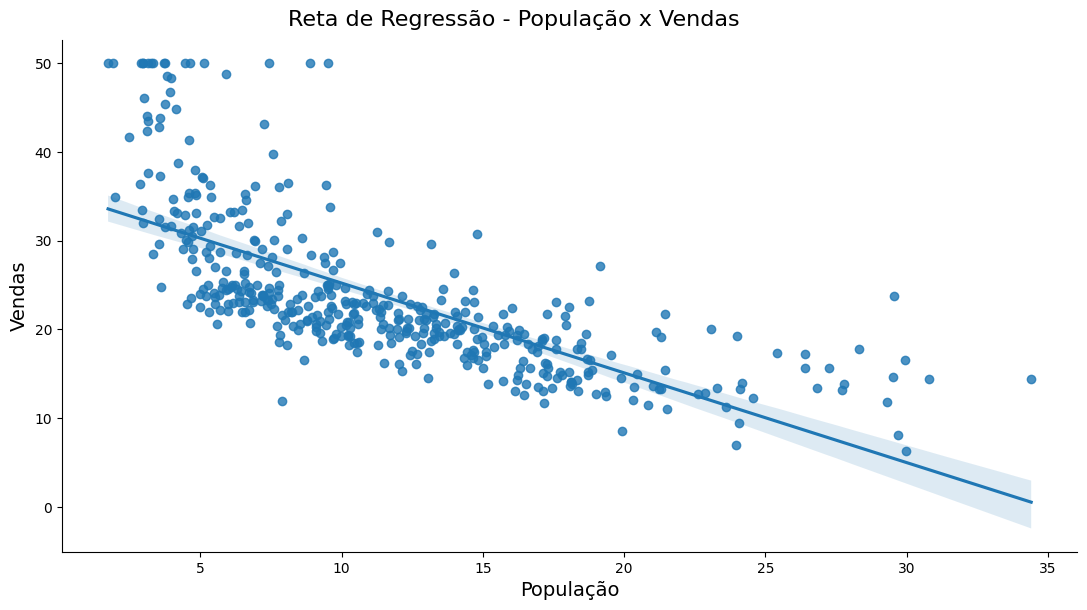

In [ ]:
# Reta de regressão teste 3

ax = sns.lmplot(x="LSTAT", y="MEDV", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - População x Vendas', fontsize=16, y=1.02)
ax.set_xlabels("População", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;

In [ ]:
function = 'MEDV~LSTAT-1'
model = smf.ols(formula=function, data=df).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              458.0
Date:                Thu, 04 May 2023   Prob (F-statistic):                    1.21e-70
Time:                        13:23:32   Log-Likelihood:                         -1943.8
No. Observations:                 452   AIC:                                      3890.
Df Residuals:                     451   BIC:                                      3894.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# O modelo com o maior R² e o menor erro padrão residual é o que melhor explica a relação entre as variáveis e é o mais adequado para fazer previsões futuras.
# No caso do case, o modelo que deve ser utilizado é a variável RM (nº de quartos), pois ela apresentanta um R quadrado = 0.921 e um erro padrão de 0.053




